In [1]:
import numpy as np
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2
import Task1
import Task2

In [2]:
X0 = np.loadtxt('nonlinear_vectorfield_data_x0.txt')
X1 = np.loadtxt('nonlinear_vectorfield_data_x1.txt')

In [3]:
V = Task2.finite_diff(X0, X1, 0.04)
A = Task1.least_squares(X0, V)

In [4]:
print(A.dot(X0[0]))
X1_hat = A.dot(X0.T)
V[0]

[-0.17443296  2.16107432]


array([ 1.15921076, -2.88308778])

In [5]:
error = Task2.error_estimation(X1.T,X1_hat)
print(error)

0.0019092132827985327


In [6]:
delta_t = np.linspace(0.01,1,int(1/0.01))
err =[]
for dt in delta_t:
    V_dt = Task2.finite_diff(X0, X1, dt)
    A_dt = Task1.least_squares(X0, V_dt)
    X1_hat = A_dt.dot(X0.T)
    error = Task2.error_estimation(X1.T,X1_hat)
    err.append(error)

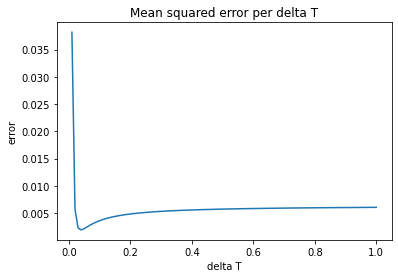

In [7]:
plt.plot(delta_t,err)
plt.ylabel('error')
plt.xlabel('delta T')
plt.title('Mean squared error per delta T')
plt.show()

In [8]:
Vrbf = Task2.finite_diff(X0, X1, 1.6)
phiX = Task1.rbf(X0,500,0.05)
C = Task1.least_squares(phiX, Vrbf)
X1_hat_rbf = phiX@C.T

In [9]:
error = Task2.error_estimation(X1,X1_hat_rbf)
print(error)

0.006207741860003594


(2, 2)
(2000, 2)
(1000, 2)


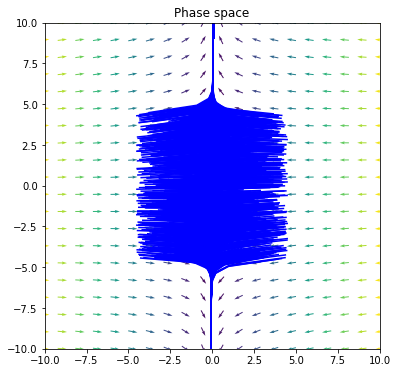

In [10]:
print(A.shape)
print(X0.shape)
Y = np.empty((1000,2))
print(Y.shape)

fig = plt.figure(figsize=(6,6))
Task2.plot_phase_portrait_2D(fig, np.zeros((1,2)), A, 'blue', x_min=-10, x_max=10, y_min=-10, y_max=+10)


for i in range(0,X0.shape[0]):
    x = X0[i]
    x = x.reshape(-1,2)
    Y[0] = x
    for t in range(1,1000):
        Y[t] = (A@x.T).T
        x = Y[t]
    Task2.plot_phase_2D(Y, 'blue')